<a href="https://colab.research.google.com/github/Ifeeding99/tensorflow-scripts/blob/main/NN_for_heart_failure_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**CONTEXT**
---



Cardiovascular diseases (CVDs) are the number 1 cause of death globally,
taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide.
Four out of 5 CVD deaths are due to heart attacks and strokes,
and one-third of these deaths occur prematurely in people under 70 years of age.
Heart failure is a common event caused by CVDs and this dataset contains 11 features
that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk
(due to the presence of one or more risk factors such as hypertension,
diabetes, hyperlipidaemia or already established disease) need early detection
and management wherein a machine learning model can be of great help.

Attribute Information
Age: age of the patient [years]

1.   Sex: sex of the patient [M: Male, F: Female]
2.   ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
3.   RestingBP: resting blood pressure [mm Hg]

4.   Cholesterol: serum cholesterol [mm/dl]

5.   FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

6.   RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

7.   MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

8.   ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

9.   Oldpeak: oldpeak = ST [Numeric value measured in depression]

10.  ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

11.  HeartDisease: output class [1: heart disease, 0: Normal]


https://www.kaggle.com/fedesoriano/heart-failure-prediction

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
df = pd.read_csv('heart.csv')
y = df.pop('HeartDisease')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


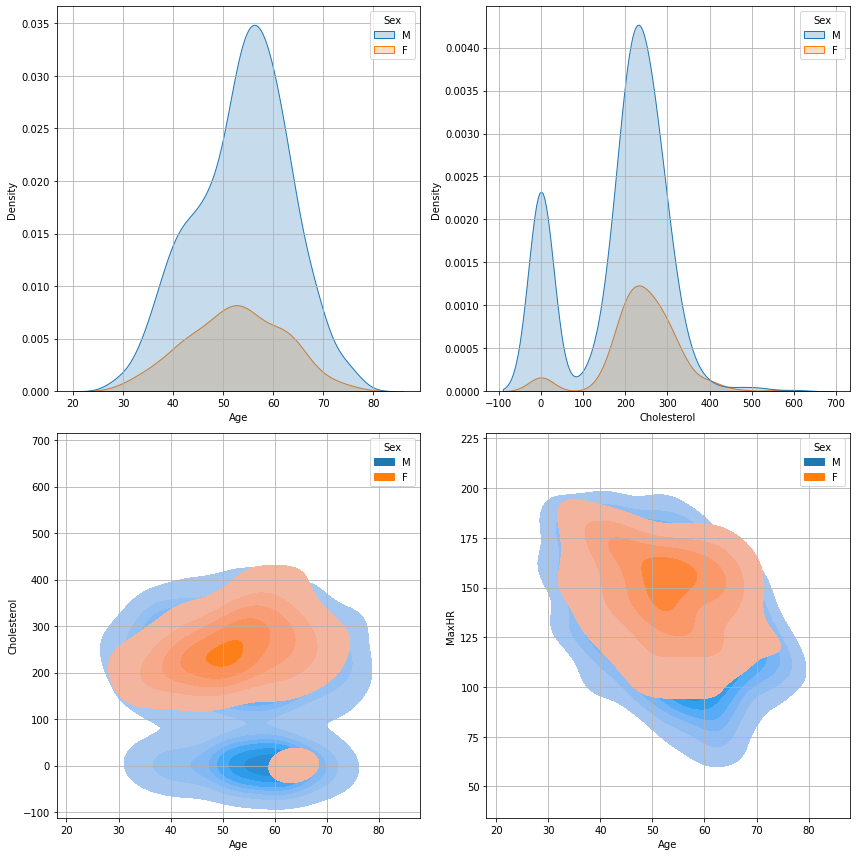

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(12,12))
sns.kdeplot(x = 'Age', hue = 'Sex', shade = True, data = df, ax = ax[0,0])
sns.kdeplot(x = 'Cholesterol', hue = 'Sex', shade = True, data = df, ax = ax[0,1])
sns.kdeplot(x ='Age', y = 'Cholesterol', hue = 'Sex', shade = True, data = df, ax = ax[1,0])
sns.kdeplot(x = 'Age', y = 'MaxHR', hue = 'Sex', shade = True, data = df, ax = ax[1,1])
ax[0,0].grid()
ax[0,1].grid()
ax[1,0].grid()
ax[1,1].grid()
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


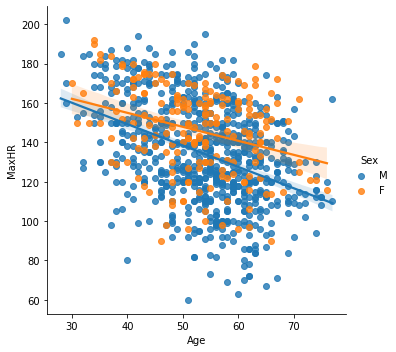

In [ ]:
sns.lmplot('Age', 'MaxHR', hue = 'Sex', data = df)

In [ ]:
# check for NaNs
nan_col = df.columns[df.isna().any()].tolist()
nan_col # no NaNs in the dataset


[]

In [ ]:
# preprocessing data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

trans = [
         ['Scaler', StandardScaler(), [0, 3, 4, 5, 7, 9]],
         ['Encoder', OneHotEncoder(), [1, 2, 6, 8, 10]]
]
ct = ColumnTransformer(transformers = trans, remainder = 'passthrough')
df = pd.DataFrame(ct.fit_transform(df))
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
# dividing the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, random_state = 0)

In [ ]:
# now I work with the neural network
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential([
                    layers.Dense(units = 32, activation = 'relu', input_shape = [20]),
                    layers.Dropout(0.5),
                    layers.Dense(units=32, activation = 'relu'),
                    layers.Dropout(0.5),
                    layers.Dense(units=1, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['binary_accuracy']
)

early_stop = EarlyStopping(min_delta = 0.01, patience = 5, restore_best_weights = True)

training = model.fit(
    X_train,
    y_train,
    batch_size = 32,
    epochs = 50,
    callbacks = [early_stop]
)

Epoch 1/50
22/22 [==============================] - 1s 3ms/step - loss: 0.6877 - binary_accuracy: 0.6061
Epoch 2/50
22/22 [==============================] - 0s 2ms/step - loss: 0.6170 - binary_accuracy: 0.6773
Epoch 3/50
22/22 [==============================] - 0s 2ms/step - loss: 0.5686 - binary_accuracy: 0.7180
Epoch 4/50
22/22 [==============================] - 0s 2ms/step - loss: 0.5375 - binary_accuracy: 0.7224
Epoch 5/50
22/22 [==============================] - 0s 2ms/step - loss: 0.5195 - binary_accuracy: 0.7442
Epoch 6/50
22/22 [==============================] - 0s 2ms/step - loss: 0.4921 - binary_accuracy: 0.7834
Epoch 7/50
22/22 [==============================] - 0s 2ms/step - loss: 0.4528 - binary_accuracy: 0.7849
Epoch 8/50
22/22 [==============================] - 0s 2ms/step - loss: 0.4746 - binary_accuracy: 0.7922
Epoch 9/50
22/22 [==============================] - 0s 2ms/step - loss: 0.4291 - binary_accuracy: 0.8140
Epoch 10/50
22/22 [==============================] - 0s

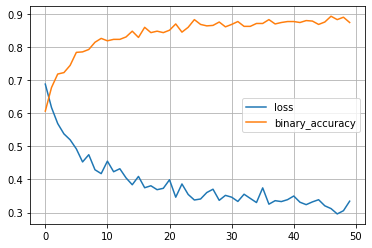

In [ ]:
history = pd.DataFrame(training.history)
history.plot()
plt.grid()

In [ ]:
model.evaluate(X_test, y_test) # Random Forest had an accuracy of 84.348 % on this dataset

8/8 [==============================] - 0s 2ms/step - loss: 0.3563 - binary_accuracy: 0.8478


[0.3563178777694702, 0.8478260636329651]